    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

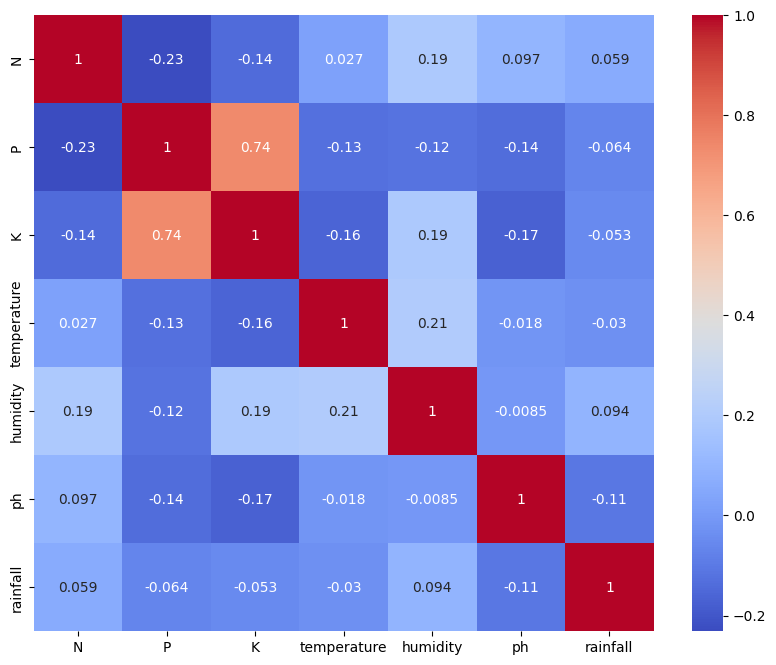

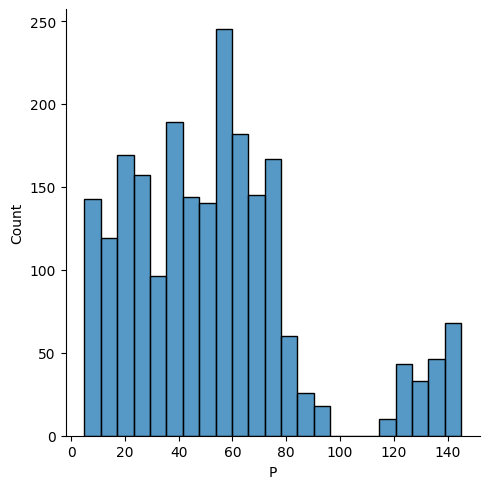

Logistic Regression with accuracy: 0.9287878787878788
Naive Bayes with accuracy: 0.9939393939393939
Support Vector Machine with accuracy: 0.9727272727272728
K-Nearest Neighbors with accuracy: 0.9742424242424242
Decision Tree with accuracy: 0.9818181818181818
Random Forest with accuracy: 0.9924242424242424
Bagging with accuracy: 0.9893939393939394


c:\Users\PCSM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with accuracy: 0.2106060606060606
Gradient Boosting with accuracy: 0.9833333333333333
Extra Trees with accuracy: 0.9030303030303031
Random Forest accuracy: 0.990909090909091
kidneybeans is the best crop to be cultivated


c:\Users\PCSM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load dataset
crop = pd.read_csv("Crop_recommendation.csv")

# Display dataset information
print(crop.head())
print(crop.shape)
print(crop.info())
print(crop.isnull().sum())
print(crop.duplicated().sum())
print(crop.describe())

# Correlation matrix
numeric_crop = crop.select_dtypes(include=[np.number])
corr = numeric_crop.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')
plt.show()

# Distribution plot for 'P'
sns.displot(crop['P'])
plt.show()

# Encoding Data
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
    'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
    'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15,
    'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19,
    'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

# Split dataset
X = crop.drop('label', axis=1)
y = crop['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scale features
scaler = MinMaxScaler()  # or StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} with accuracy: {accuracy_score(y_test, y_pred)}")

# Train RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred))

# Predictive System
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])
    transformed_features = scaler.transform(features)  # Use the scaler fitted on training data
    prediction = rand_clf.predict(transformed_features)
    return prediction[0]

# Example prediction
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 2
ph = 13
rainfall = 100

predict = recommendation(N, P, k, temperature, humidity, ph, rainfall)

# Mapping prediction to crop name
inverse_crop_dict = {v: k for k, v in crop_dict.items()}
crop = inverse_crop_dict.get(predict, "No recommendation available")
print(f"{crop} is the best crop to be cultivated")

# Save models and scalers
with open('model.pkl', 'wb') as f:
    pickle.dump(rand_clf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

